In [1]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.show()
plt.close()
matplotlib.rcParams.update({"font.size": 16})

<Figure size 432x288 with 0 Axes>

In [2]:
import copy

In [3]:
import pandas as pd

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [5]:
# gpr fitting
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, RationalQuadratic, Matern, DotProduct

In [6]:
import phenom

In [7]:
import workflow_utils

In [8]:
import pn

In [9]:
import numpy as np

In [10]:
import os

In [11]:
# custom module
import collocation

In [12]:
import sympy
# sympy.init_printing()
x_sym, a_sym, om_rd = sympy.symbols('x_sym a_sym om_rd')

In [13]:
data_dict = workflow_utils.load_nr_data()
# data_dict = workflow_utils.load_nr_data(test_set_query='(q>1 and q<2) or (q>2 and q<=4) or (q>=7 and q<10) or (q>=14 and q<16)')

In [14]:
data_dict['df'].query('has_dup == True')['q'].value_counts()

4.0     7
10.0    5
5.0     5
2.0     5
1.0     5
18.0    3
8.0     3
15.0    2
32.0    2
6.0     2
Name: q, dtype: int64

In [15]:
data_dict['df'].query('has_dup == False')['q'].value_counts()

7.00    1
1.18    1
1.33    1
2.41    1
1.82    1
2.20    1
2.05    1
2.25    1
2.35    1
1.20    1
3.00    1
1.75    1
1.50    1
1.25    1
2.50    1
Name: q, dtype: int64

In [16]:
data_dict['df'].query('set == "train"')

name     q     fring     fdamp  duration  t_final  \
0   q18a0a0c025_96_fine  18.0  0.063334  0.014140    1020.0    465.8   
4     q10c25e_T_112_448  10.0  0.066184  0.014119    1157.7    121.6   
6       q18a0a0c025_144  18.0  0.063334  0.014140    1028.3     88.8   
8       q18a0a0c025_120  18.0  0.063334  0.014140    1027.5    174.7   
10    SXS_BBH_0107_Res3   5.0  0.071862  0.014048    7440.1    449.9   
12    SXS_BBH_0107_Res5   5.0  0.071862  0.014048    7465.5    451.5   
13    SXS_BBH_0107_Res4   5.0  0.071862  0.014048    7457.2    449.8   
15    SXS_BBH_0169_Res4   2.0  0.083149  0.013774    3458.2    406.7   
16    SXS_BBH_0169_Res5   2.0  0.083149  0.013774    3468.3    406.6   
17    SXS_BBH_0169_Res3   2.0  0.083149  0.013774    3088.2    406.7   
18    SXS_BBH_0180_Res3   1.0  0.088087  0.013596    9359.5    236.6   
19    SXS_BBH_0303_Res3  10.0  0.066184  0.014119    3397.6    498.9   
20    SXS_BBH_0180_Res2   1.0  0.088087  0.013596    9354.6    236.8   
21    SXS_BBH_0303_Res4  10.0  0.066184  0.014119    3433.2    499.1   
22    SXS_BBH_0180_Res4   1.0  0.088087  0.013596    9270.5    236.4   
23    SXS_BBH_0303_Res5  10.0  0.066184  0.014119    3461.4    499.7   
26    RIT-BBH-0152-n120   5.0  0.071862  0.014048    4000.5    557.5   
27   RIT-eBBH-1090-n100   1.0  0.088087  0.013596    1493.9    362.0   
31    RIT-BBH-0112-n100   1.0  0.088087  0.013596   16963.4    419.5   
35    RIT-BBH-0090-n100   6.0  0.070079  0.014075    1746.7    392.9   
37   RIT-eBBH-1200-n100   2.0  0.083149  0.013774    1637.8    318.1   
38    RIT-BBH-0978-n144  10.0  0.066184  0.014119    1963.0    393.4   
46               GT0446   2.0  0.083149  0.013774    1378.6    470.3   
51               GT0577   5.0  0.071862  0.014048    1281.6    574.2   
53               GT0604   6.0  0.070079  0.014075    1496.1    460.8   

    start_freq_100Msun    set  has_dup                        tag  
0            26.412409  train     True  q18.0_q18a0a0c025_96_fine  
4            24.089458  train     True    q10.0_q10c25e_T_112_448  
6            26.822393  train     True      q18.0_q18a0a0c025_144  
8            26.803431  train     True      q18.0_q18a0a0c025_120  
10           21.467280  train     True     q5.0_SXS_BBH_0107_Res3  
12           21.470175  train     True     q5.0_SXS_BBH_0107_Res5  
13           21.477605  train     True     q5.0_SXS_BBH_0107_Res4  
15           19.330074  train     True     q2.0_SXS_BBH_0169_Res4  
16           19.329955  train     True     q2.0_SXS_BBH_0169_Res5  
17           19.330978  train     True     q2.0_SXS_BBH_0169_Res3  
18           18.842745  train     True     q1.0_SXS_BBH_0180_Res3  
19           24.051628  train     True    q10.0_SXS_BBH_0303_Res3  
20           18.843902  train     True     q1.0_SXS_BBH_0180_Res2  
21           23.964726  train     True    q10.0_SXS_BBH_0303_Res4  
22           18.842414  train     True     q1.0_SXS_BBH_0180_Res4  
23           23.954080  train     True    q10.0_SXS_BBH_0303_Res5  
26           21.496339  train     True     q5.0_RIT-BBH-0152-n120  
27           18.698119  train     True    q1.0_RIT-eBBH-1090-n100  
31           18.816687  train     True     q1.0_RIT-BBH-0112-n100  
35           21.985765  train     True     q6.0_RIT-BBH-0090-n100  
37           19.432679  train     True    q2.0_RIT-eBBH-1200-n100  
38           23.965060  train     True    q10.0_RIT-BBH-0978-n144  
46           19.420446  train     True                q2.0_GT0446  
51           21.252659  train     True                q5.0_GT0577  
53           21.755238  train     True                q6.0_GT0604

In [17]:
data_dict['df'].query('set == "test"')

name      q     fring     fdamp  duration  t_final  \
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   

    start_freq_100Msun   set  has_dup                        tag  
1            21.017192  test     True         q4.0_q4a0_T_96_384  
2            22.213681  test     True   q8.0_q8a0a0_T_96_504n512  
3            21.837768  test     True    q8.0_q8a0a0c05_T_80_420  
5            20.716335  test     True         q4.0_q4a0_T_80_320  
7            22.608305  test     True  q8.0_q8a0a0_T_112_588n768  
9            20.892015  test     True        q4.0_q4a0_T_112_448  
11           20.834667  test     True     q4.0_SXS_BBH_0167_Res5  
14           20.826849  test     True     q4.0_SXS_BBH_0167_Res3  
24           22.550395  test    False     q7.0_RIT-BBH-0416-n140  
25           18.879524  test    False    q1.18_RIT-BBH-0084-n100  
28           20.749856  test     True    q4.0_RIT-eBBH-1133-n100  
29           18.760052  test    False   q1.33_RIT-eBBH-1241-n100  
30           25.475422  test     True    q15.0_RIT-BBH-0942-n120  
32           19.662163  test    False    q2.41_RIT-BBH-0139-n140  
33           25.544053  test     True    q15.0_RIT-BBH-0373-n140  
34           28.943415  test     True    q32.0_RIT-BBH-0792-n120  
36           19.162643  test    False    q1.82_RIT-BBH-1020-n144  
39           28.463783  test     True    q32.0_RIT-BBH-1025-n100  
40           19.551357  test    False                q2.2_GT0379  
41           19.380001  test    False               q2.05_GT0378  
42           19.557346  test    False               q2.25_GT0757  
43           19.678339  test    False               q2.35_GT0380  
44           20.814909  test     True                q4.0_GT0454  
45           18.930344  test    False                q1.2_GT0898  
47           20.145314  test    False                q3.0_GT0453  
48           19.194165  test    False               q1.75

In [18]:
data_dict.keys()

dict_keys(['df', 'times', 'strains', 'amps', 'phases', 'freqs', 'train_idxs', 'test_idxs'])

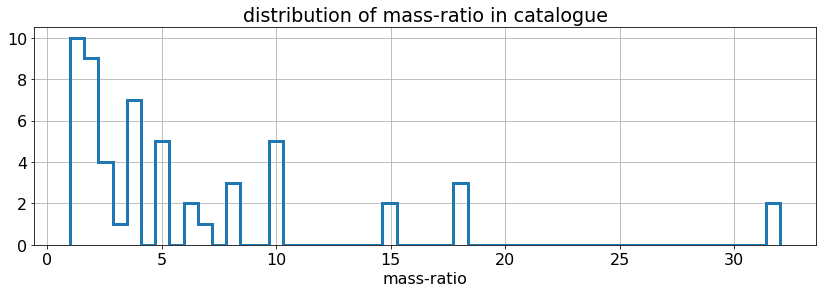

In [19]:
plt.figure(figsize=(14, 4))
plt.hist(data_dict['df']['q'], bins=50, histtype='step', lw=3)
plt.xlabel("mass-ratio");
plt.title("distribution of mass-ratio in catalogue")
plt.grid()

In [20]:
waveforms = [
    workflow_utils.Waveform(
        strain=data_dict['strains'][i],
        times=data_dict['times'],
        amp=data_dict['amps'][i],
        phase=data_dict['phases'][i],
        freq=data_dict['freqs'][i],
        q=data_dict['df']['q'].values[i],
        meta_data=data_dict['df'].loc[[i]],
    )
    for i in range(len(data_dict['df']))]

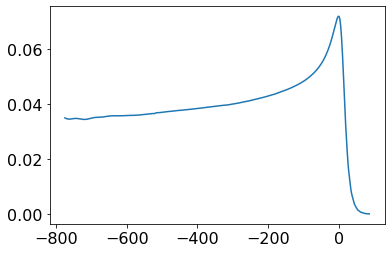

In [21]:
plt.plot(waveforms[0].times, waveforms[0].amp)

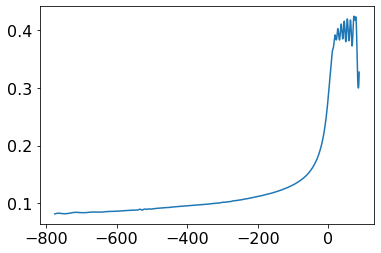

In [22]:
plt.plot(waveforms[0].times, waveforms[0].freq)

# inspiral omega fit

In [23]:
idx = 18

In [24]:
waveforms[idx].q

1.0

In [25]:
tc=0
eta=waveforms[idx].eta
M=1

In [26]:
t_, y_ = workflow_utils.prepare_fit_data(
    waveform=waveforms[idx],
    t_start=-700,
    t_end=-100,
    target='freq',
)

omega_N, omega_pn = workflow_utils.get_taylort3_inspiral_omega_affine_params(t_, tc, eta, M)

In [27]:
y_transformed = workflow_utils.transformation_affine_reverse(y_, omega_N, omega_pn)

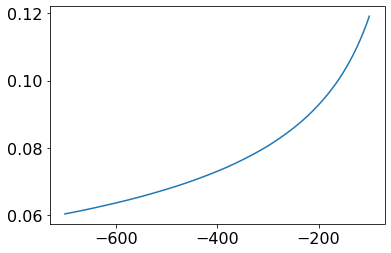

In [28]:
plt.plot(t_, y_)

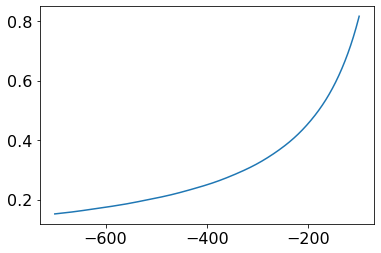

In [29]:
plt.plot(t_, y_transformed)

In [30]:
base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10])
collocation_points = {
    # 0:[-700, -500, -300],
    0:[-700, -300, -100],
    # 1:[-700, -300],
}

In [31]:
base_ansatz

x_sym**10 + x_sym**9 + x_sym**8

In [32]:
pn_kwargs=dict(t=t_, tc=tc, eta=eta, M=M)
theta = pn.TaylorT3_theta(x_sym, pn_kwargs['tc'], pn_kwargs['eta'], pn_kwargs['M'])
pn_sub_dict = {'x_sym': theta }
ansatz = base_ansatz.subs(pn_sub_dict)
sub_dict={}

In [33]:
ansatz

42.2948505376226/(-x_sym)**1.25 + 29.0843086689791/(-x_sym)**1.125 + 20.0/(-x_sym)**1.0

In [34]:
wcf = workflow_utils.WaveformCollocationFitter(
    t_,
    y_transformed,
    collocation_points,
    ansatz,
    sub_dict,
)

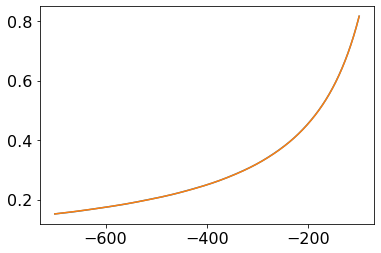

In [35]:
plt.plot(t_, y_transformed)
plt.plot(t_, wcf.cm.predict(t_))

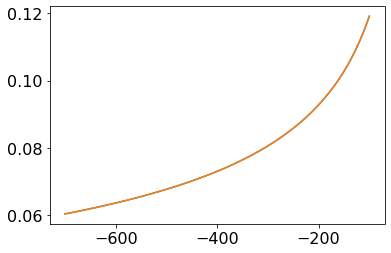

In [36]:
plt.plot(t_, y_)
plt.plot(t_, workflow_utils.transformation_affine_foward(wcf.cm.predict(t_), omega_N, omega_pn))

In [37]:
wcf.cm.collocation_points

{0: [-700, -300, -100]}

In [38]:
wcf.cm.rhs

{0: array([0.15192374, 0.32150848, 0.81687837])}

In [39]:
wcf.cm.coeffs

array([-5.91062232,  9.4093375 , -0.73487873])

In [40]:
wcf.cm.ansatz

42.2948505376226/(-x_sym)**1.25 + 29.0843086689791/(-x_sym)**1.125 + 20.0/(-x_sym)**1.0

# fit inspiral frequency

In [41]:
# loop over all entires
df = data_dict['df'].copy()

wcfs = []
omega_Ns = []
omega_pns = []

#### GLOBAL PARAMETERS

tc=0
M=1

t_start = -800
# t_end = -299
# t_end = -199
t_end = -99
# dt = 0.1
dt = None

target='freq'

## DEFINE ANSATZ

base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10])
# base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10, x_sym**11])
collocation_points = {
    # 0:[-700, -500, -300],
    0:[-700, -300, -100],
    # 0:[-700, -500, -200],
    # 0:[-700, -500, -300, -100],
    # 1:[-300],
}


for i in range(len(df)):
    q = df.iloc[i]['q']
    name = df.iloc[i]['name']
    set_member = df.iloc[i]['set']
    print(f"working: {i} ({set_member}): q={q} \t {name}")
    
    eta = phenom.eta_from_q(q)
    
    # get data to fit
    t_, y_ = workflow_utils.prepare_fit_data(
        waveform=waveforms[i],
        t_start=t_start,
        t_end=t_end,
        target=target,
        dt=dt,
    )
    
    # PN parameters
    pn_kwargs=dict(t=t_, tc=tc, eta=eta, M=M)

    # Get PN transformation variables
    omega_N, omega_pn = workflow_utils.get_taylort3_inspiral_omega_affine_params(t_, tc, eta, M)
    
    # apply tranformation
    y_transformed = workflow_utils.transformation_affine_reverse(y_, omega_N, omega_pn)
    
    # prepare ansatz
    theta = pn.TaylorT3_theta(x_sym, tc, eta, M)
    pn_sub_dict = {'x_sym': theta }
    ansatz = base_ansatz.subs(pn_sub_dict)
    sub_dict={}
    
    wcf = workflow_utils.WaveformCollocationFitter(
        t_,
        y_transformed,
        collocation_points,
        ansatz,
        sub_dict,
    )

    omega_Ns.append(omega_N)
    omega_pns.append(omega_pn)
    wcfs.append(wcf)

working: 0 (train): q=18.0 	 q18a0a0c025_96_fine
working: 1 (test): q=4.0 	 q4a0_T_96_384
working: 2 (test): q=8.0 	 q8a0a0_T_96_504n512
working: 3 (test): q=8.0 	 q8a0a0c05_T_80_420
working: 4 (train): q=10.0 	 q10c25e_T_112_448
working: 5 (test): q=4.0 	 q4a0_T_80_320
working: 6 (train): q=18.0 	 q18a0a0c025_144
working: 7 (test): q=8.0 	 q8a0a0_T_112_588n768
working: 8 (train): q=18.0 	 q18a0a0c025_120
working: 9 (test): q=4.0 	 q4a0_T_112_448
working: 10 (train): q=5.0 	 SXS_BBH_0107_Res3
working: 11 (test): q=4.0 	 SXS_BBH_0167_Res5
working: 12 (train): q=5.0 	 SXS_BBH_0107_Res5
working: 13 (train): q=5.0 	 SXS_BBH_0107_Res4
working: 14 (test): q=4.0 	 SXS_BBH_0167_Res3
working: 15 (train): q=2.0 	 SXS_BBH_0169_Res4
working: 16 (train): q=2.0 	 SXS_BBH_0169_Res5
working: 17 (train): q=2.0 	 SXS_BBH_0169_Res3
working: 18 (train): q=1.0 	 SXS_BBH_0180_Res3
working: 19 (train): q=10.0 	 SXS_BBH_0303_Res3
working: 20 (train): q=1.0 	 SXS_BBH_0180_Res2
working: 21 (train): q=10.0 	 SXS

In [42]:
wcfs[0]

In [43]:
wcfs[i].x

array([-775. , -774.9, -774.8, ...,  -99.3,  -99.2,  -99.1])

Text(0.5, 0.98, 'q4a0_T_96_384')

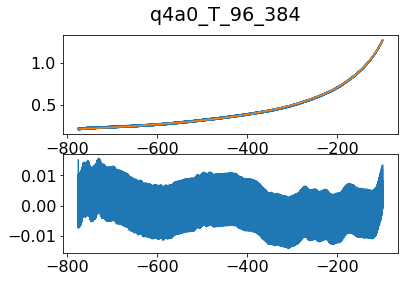

In [44]:
i = 1

plt.subplot(2, 1, 1)
plt.plot(wcfs[i].x, wcfs[i].y)
plt.plot(wcfs[i].x, wcfs[i].cm.predict(wcfs[i].x))

plt.subplot(2, 1, 2)
plt.plot(wcfs[i].x, wcfs[i].y-wcfs[i].cm.predict(wcfs[i].x))

plt.suptitle(df.iloc[i]['name'])

Text(0.5, 0.98, 'q4a0_T_96_384')

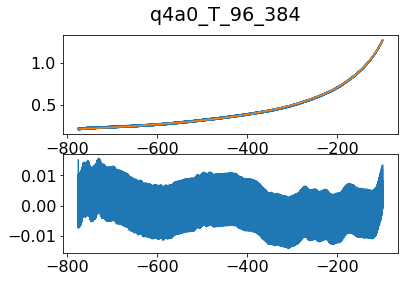

In [45]:
i = 1

plt.subplot(2, 1, 1)
plt.plot(wcfs[i].x, wcfs[i].y)
plt.plot(wcfs[i].x, wcfs[i].cm.predict(wcfs[i].x))

plt.subplot(2, 1, 2)
plt.plot(wcfs[i].x, wcfs[i].y-wcfs[i].cm.predict(wcfs[i].x))

plt.suptitle(df.iloc[i]['name'])

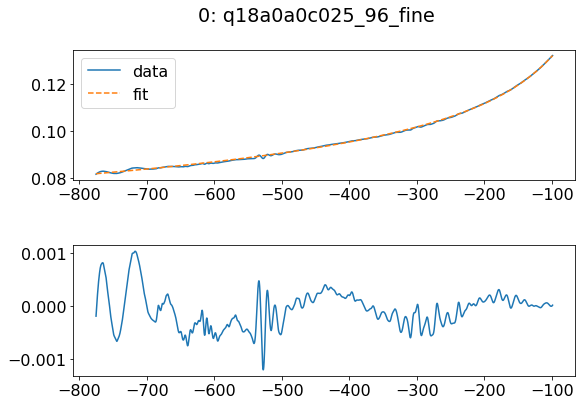

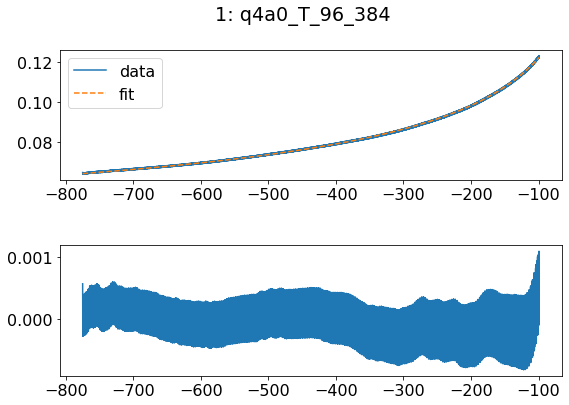

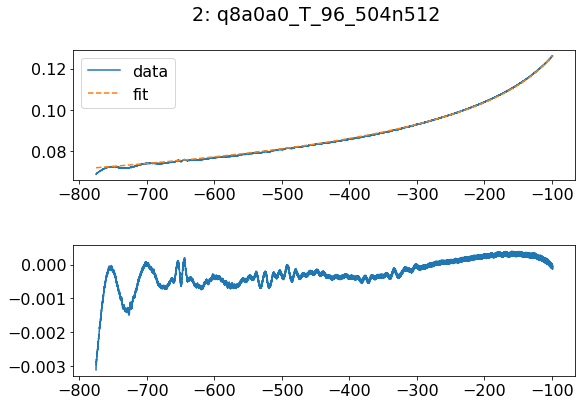

In [46]:
# for i in range(len(data_dict['df'])):
for i in range(3):


    y0_ = workflow_utils.transformation_affine_foward(wcfs[i].y, omega_Ns[i], omega_pns[i])
    y1_ = workflow_utils.transformation_affine_foward(wcfs[i].cm.predict(wcfs[i].x), omega_Ns[i], omega_pns[i])
    pn_ = omega_pns[i]

    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wcfs[i].x, y0_, label='data')
    plt.plot(wcfs[i].x, y1_, label='fit', ls='--')
    # plt.plot(wcfs[i].x, pn_, label='pn')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(wcfs[i].x, y0_-y1_)

    tag = f"{i}: {df.iloc[i]['name']}"
    plt.suptitle(tag)
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    plt.close()

# parameter space fit

In [47]:
tags = wcfs[0].cm.tags
tags

['d0_c0', 'd0_c1', 'd0_c2']

In [48]:
df_psf_x = data_dict['df']['q']

In [49]:
df_psf_y = pd.DataFrame(np.array([w.cm.rhs_1d for w in wcfs]), columns=tags)

In [50]:
df_psf_y

d0_c0     d0_c1     d0_c2
0   0.692323  1.438972  3.579496
1   0.231071  0.496360  1.251387
2   0.372256  0.774847  1.962402
3   0.359727  0.770440  1.964258
4   0.427591  0.906361  2.303383
5   0.235073  0.490386  1.263239
6   0.689122  1.434868  3.577320
7   0.374349  0.774232  1.961443
8   0.688975  1.431866  3.578094
9   0.230171  0.490188  1.260511
10  0.264856  0.557719  1.430075
11  0.228029  0.490629  1.255772
12  0.265252  0.557955  1.430696
13  0.265958  0.557566  1.430588
14  0.227571  0.491432  1.256515
15  0.170075  0.357423  0.913045
16  0.170108  0.357370  0.913439
17  0.170192  0.358205  0.913134
18  0.151924  0.321508  0.816878
19  0.435516  0.906868  2.301450
20  0.152041  0.321498  0.816839
21  0.432287  0.910441  2.301897
22  0.151886  0.321475  0.816881
23  0.433268  0.909919  2.302150
24  0.325615  0.701181  1.783491
25  0.154692  0.321956  0.822244
26  0.264106  0.562283  1.427666
27  0.143254  0.331332  0.821311
28  0.224949  0.497291  1.257196
29  0.153080  0.333060  0.839223
30  0.590402  1.245046  3.111347
31  0.147092  0.317618  0.818619
32  0.179812  0.382013  0.975247
33  0.592256  1.243675  3.111811
34  1.113044  2.265875  5.566891
35  0.300800  0.620075  1.608548
36  0.159558  0.353403  0.889840
37  0.180667  0.348026  0.912078
38  0.429171  0.909991  2.300820
39  1.104698  2.273077  5.565105
40  0.178776  0.380456  0.954922
41  0.173300  0.372062  0.928674
42  0.184821  0.376020  0.960745
43  0.181295  0.389517  0.978441
44  0.234780  0.498866  1.261753
45  0.164837  0.331175  0.834410
46  0.176295  0.361711  0.916772
47  0.203278  0.427297  1.084595
48  0.167766  0.352255  0.890866
49  0.161492  0.345028  0.858812
50  0.152987  0.334946  0.836781
51  0.253084  0.548578  1.438407
52  0.187406  0.396185  1.001156
53  0.293944  0.640854  1.613987

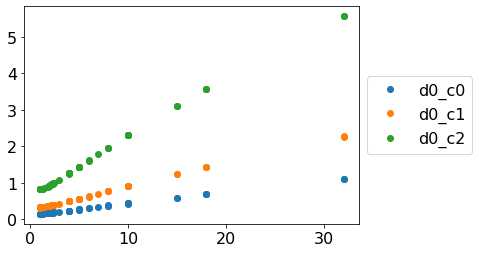

In [51]:
for col in df_psf_y.columns:
    plt.plot(df_psf_x, df_psf_y[col], 'o', label=col)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

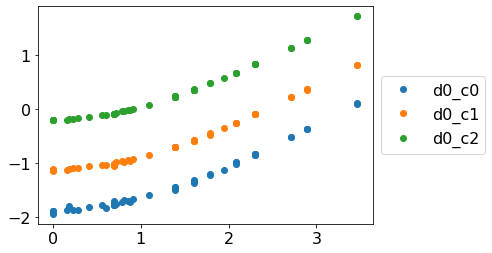

In [52]:
for col in df_psf_y.columns:
    plt.plot(np.log(df_psf_x), np.log(df_psf_y[col]), 'o', label=col)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [53]:
train_idxs = data_dict['df'].query('set == "train"').index
train_idxs

Int64Index([ 0,  4,  6,  8, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26,
            27, 31, 35, 37, 38, 46, 51, 53],
           dtype='int64')

In [54]:
test_idxs = data_dict['df'].query('set == "test"').index
test_idxs

Int64Index([ 1,  2,  3,  5,  7,  9, 11, 14, 24, 25, 28, 29, 30, 32, 33, 34, 36,
            39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52],
           dtype='int64')

In [55]:
def compute_alphas(xs, ys):
    """
    xs: pd.Series of mass-ratios
    ys: pd.DataFrame of collocation rhs values.
    
    sets the self.alphas attribute
    use this when you have multiple observations i.e. multiple mass-ratio x simulations
    for each collocation point we compute the standard deviation over observations
    and use this as a proxy for the uncertainty in that data point.
    for data points where we only have one observation we assume that their uncertainty
    is given by the median value of the distribution of standard deviations
    """
    
    alphas = {}
    for col in ys.columns:
        df = pd.DataFrame({'x':xs, 'y':ys[col]})
        # group by mass-ratio and compute standard deviation
        df2 = df.groupby(by='x').std()
        df2=df2.rename(columns={'y':'alpha'})
        # remove nans (these are the cases were only one simulation exists)
        # and compute the median value of the distribution of stds
        median_std = np.median(df2['alpha'].values[~np.isnan(df2['alpha'].values)])
        print(median_std)
        # impute nans with median value
        # join back onto original dataframe so that we have a value of alpha
        # for every data point
        df3=pd.merge(df, df2.fillna(median_std), left_on='x', right_index=True).sort_index()
        alphas[col] = df3['alpha'].values

    return alphas

In [56]:
df_psf_x_train = df_psf_x.iloc[train_idxs]
df_psf_y_train = df_psf_y.iloc[train_idxs]

In [57]:
df_psf_x_test = df_psf_x.iloc[test_idxs]
df_psf_y_test = df_psf_y.iloc[test_idxs]

In [58]:
alphas = compute_alphas(df_psf_x_train, df_psf_y_train)

0.004391834407604302
0.005048199907161819
0.0018704100346122491


In [59]:
alphas

{'d0_c0': array([0.00189192, 0.00318436, 0.00189192, 0.00189192, 0.00538995,
        0.00538995, 0.00538995, 0.00483088, 0.00483088, 0.00483088,
        0.00395279, 0.00318436, 0.00395279, 0.00318436, 0.00395279,
        0.00318436, 0.00538995, 0.00395279, 0.00395279, 0.00484731,
        0.00483088, 0.00318436, 0.00483088, 0.00538995, 0.00484731]),
 'd0_c1': array([0.00356742, 0.00193693, 0.00356742, 0.00356742, 0.00501068,
        0.00501068, 0.00501068, 0.00508572, 0.00508572, 0.00508572,
        0.00511636, 0.00193693, 0.00511636, 0.00193693, 0.00511636,
        0.00193693, 0.00501068, 0.00511636, 0.00511636, 0.0146933 ,
        0.00508572, 0.00193693, 0.00508572, 0.00501068, 0.0146933 ]),
 'd0_c2': array([0.0011031 , 0.00095156, 0.0011031 , 0.0011031 , 0.00405934,
        0.00405934, 0.00405934, 0.00179473, 0.00179473, 0.00179473,
        0.00194609, 0.00095156, 0.00194609, 0.00095156, 0.00194609,
        0.00095156, 0.00405934, 0.00194609, 0.00194609, 0.00384616,
        0.0017947

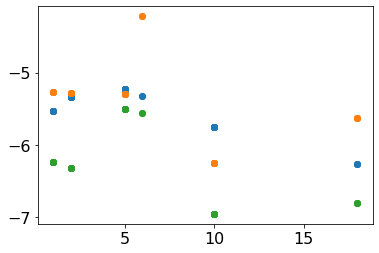

In [60]:
plt.plot(df_psf_x_train, np.log(alphas['d0_c0']), 'o')
plt.plot(df_psf_x_train, np.log(alphas['d0_c1']), 'o')
plt.plot(df_psf_x_train, np.log(alphas['d0_c2']), 'o')

In [61]:
df_psf_signs = df_psf_y_train.apply(lambda x: np.sign(x)).iloc[[0]]
df_psf_signs

d0_c0  d0_c1  d0_c2
0    1.0    1.0    1.0

In [62]:
# def gpr_fit(x:np.ndarray, y:np.ndarray, GaussianProcessRegressor_kwargs, log_abs_transform=True):
def gpr_fit(x:np.ndarray, y:np.ndarray, GaussianProcessRegressor_kwargs):
    """
    use_estimate_alpha: if this is true then will use an estimate for alpha based on the data
    """
    # if log_abs_transform:
        # y = np.log(np.abs(y))
    gpr = GaussianProcessRegressor(**GaussianProcessRegressor_kwargs).fit(x[:,np.newaxis], y)
    
    return gpr

In [63]:
df_psf_x_train.values

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [64]:
alphas['d0_c0']

array([0.00189192, 0.00318436, 0.00189192, 0.00189192, 0.00538995,
       0.00538995, 0.00538995, 0.00483088, 0.00483088, 0.00483088,
       0.00395279, 0.00318436, 0.00395279, 0.00318436, 0.00395279,
       0.00318436, 0.00538995, 0.00395279, 0.00395279, 0.00484731,
       0.00483088, 0.00318436, 0.00483088, 0.00538995, 0.00484731])

In [65]:
GaussianProcessRegressor_kwargs=dict(
    kernel=Matern(nu=2.5) * ConstantKernel() + DotProduct() * ConstantKernel(),
    # alpha=1e-3, ## this is normally used i think
    alpha=alphas['d0_c0'],
    random_state=0,
    normalize_y=True,
    n_restarts_optimizer=100,
    # optimizer=None
)

In [66]:
# transformations
# x -> log(x)
# y -> log(sign(y) * y)
# for y we first enforce that the target is positive and then we take the log
gpr = gpr_fit(
    x=df_psf_x_train.apply(lambda x: np.log(x)).values,
    y=df_psf_y_train['d0_c0'].apply(lambda x: np.log(df_psf_signs['d0_c0'].values * x)).values,
    GaussianProcessRegressor_kwargs=GaussianProcessRegressor_kwargs,
)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [67]:
qs_fine = np.arange(1, 40, 0.3)[:,np.newaxis]

In [68]:
df_psf_signs['d0_c0']

0    1.0
Name: d0_c0, dtype: float64

In [69]:
mu_test, std_test = gpr.predict(np.log(qs_fine), return_std=True)
mu_test_lower = df_psf_signs['d0_c0'].values * np.exp(mu_test-std_test)
mu_test_upper = df_psf_signs['d0_c0'].values * np.exp(mu_test+std_test)
mu_test = df_psf_signs['d0_c0'].values * np.exp(mu_test)

# mu_test_lower =mu_test-std_test
# mu_test_upper =mu_test+std_test
# mu_test =mu_test

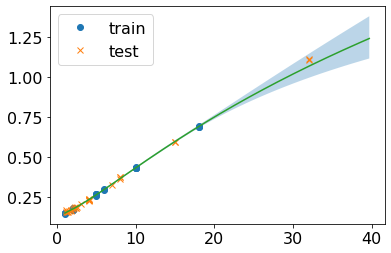

In [70]:
plt.plot(df_psf_x_train, df_psf_y_train['d0_c0'], 'o', label='train')
plt.plot(df_psf_x_test, df_psf_y_test['d0_c0'], 'x', label='test')

# plt.plot(df_psf_x_train, df_psf_y_train['d0_c0'].apply(lambda x: np.log(df_psf_signs['d0_c0'].values * x)).values, 'o', label='train')
# plt.plot(df_psf_x_test, df_psf_y_test['d0_c0'].apply(lambda x: np.log(df_psf_signs['d0_c0'].values * x)).values, 'x', label='test')

plt.plot(qs_fine, mu_test)
plt.fill_between(qs_fine[:,0], y1=mu_test_lower, y2=mu_test_upper, alpha=0.3)
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

working: d0_c0


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


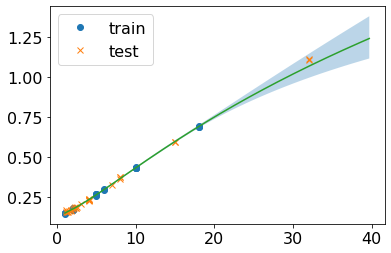

working: d0_c1


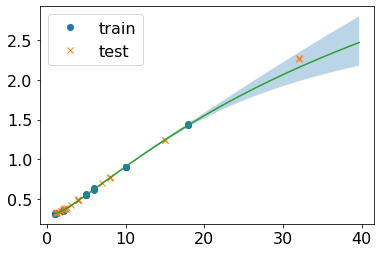

working: d0_c2


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


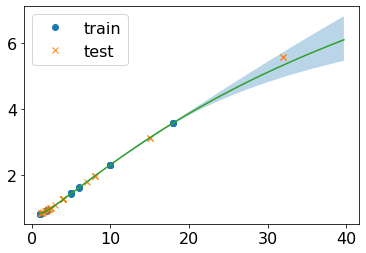

In [71]:
# loop over a fit
gps={}
for col in df_psf_y_train.columns:
    print(f"working: {col}")
    GaussianProcessRegressor_kwargs=dict(
        kernel=Matern(nu=2.5) * ConstantKernel() + DotProduct() * ConstantKernel(),
        # alpha=1e-3, ## this is normally used i think
        alpha=alphas[col],
        random_state=0,
        normalize_y=True,
        n_restarts_optimizer=100,
        # optimizer=None
    )
    
    # transformations
    # x -> log(x)
    # y -> log(sign(y) * y)
    # for y we first enforce that the target is positive and then we take the log
    x=df_psf_x_train.apply(lambda x: np.log(x)).values
    y=df_psf_y_train[col].apply(lambda x: np.log(df_psf_signs[col].values * x)).values
    gp = gpr_fit(
        x=x,
        y=y,
        GaussianProcessRegressor_kwargs=GaussianProcessRegressor_kwargs,
    )
    gps[col] = gp
    
    
    mu_samples = gp.sample_y(np.log(qs_fine), n_samples=100, random_state=0)
    mu_samples = df_psf_signs[col].values * np.exp(mu_samples)
    mu_test, std_test = gp.predict(np.log(qs_fine), return_std=True)
    mu_test_lower = df_psf_signs[col].values * np.exp(mu_test-std_test)
    mu_test_upper = df_psf_signs[col].values * np.exp(mu_test+std_test)
    mu_test = df_psf_signs[col].values * np.exp(mu_test)
    plt.figure()
    plt.plot(df_psf_x_train, df_psf_y_train[col], 'o', label='train')
    plt.plot(df_psf_x_test, df_psf_y_test[col], 'x', label='test')
    plt.plot(qs_fine, mu_test)
    plt.fill_between(qs_fine[:,0], y1=mu_test_lower, y2=mu_test_upper, alpha=0.3)
    # plt.plot(qs_fine, mu_samples, c='k', alpha=0.05)
    # plt.yscale('log')
    # plt.xscale('log')
    plt.legend()
    plt.show()
    plt.close()

In [72]:
# inspiral model

In [73]:
collocation_points

{0: [-700, -300, -100]}

In [74]:
gps

{'d0_c0': GaussianProcessRegressor(alpha=array([0.00189192, 0.00318436, 0.00189192, 0.00189192, 0.00538995,
        0.00538995, 0.00538995, 0.00483088, 0.00483088, 0.00483088,
        0.00395279, 0.00318436, 0.00395279, 0.00318436, 0.00395279,
        0.00318436, 0.00538995, 0.00395279, 0.00395279, 0.00484731,
        0.00483088, 0.00318436, 0.00483088, 0.00538995, 0.00484731]),
                          kernel=Matern(length_scale=1, nu=2.5) * 1**2 + DotProduct(sigma_0=1) * 1**2,
                          n_restarts_optimizer=100, normalize_y=True,
                          random_state=0),
 'd0_c1': GaussianProcessRegressor(alpha=array([0.00356742, 0.00193693, 0.00356742, 0.00356742, 0.00501068,
        0.00501068, 0.00501068, 0.00508572, 0.00508572, 0.00508572,
        0.00511636, 0.00193693, 0.00511636, 0.00193693, 0.00511636,
        0.00193693, 0.00501068, 0.00511636, 0.00511636, 0.0146933 ,
        0.00508572, 0.00193693, 0.00508572, 0.00501068, 0.0146933 ]),
                    

In [75]:
wcfs[0].cm.tags

['d0_c0', 'd0_c1', 'd0_c2']

In [76]:
len(collocation_points.keys())

1

In [77]:
# generative phenomenological model (gpm)
def gpm_inspiral_omega_model(t, q, tc, M, collocation_points, base_ansatz, gps, signs_dict, n_samples=-1, sub_dict={}, random_state=None):
    """
    if n_samples = -1 then generate the mean otherwise draw a n_samples
    """
    if random_state == None:
        random_state = np.random.randint(0, 1000000)
    if n_samples == -1:
        mode = "mean"
        n_samples = 1
    else:
        mode = "sample"
    
    t = np.atleast_1d(t)
    eta = phenom.eta_from_q(q)
    log_q = np.log(q)
    
    omega_N, omega_pn = workflow_utils.get_taylort3_inspiral_omega_affine_params(t, tc, eta, M)
    
    theta = pn.TaylorT3_theta(x_sym, tc, eta, M)
    pn_sub_dict = {'x_sym': np.array(theta)}
    ansatz = base_ansatz.subs(pn_sub_dict)
    
    # number of derivatives
    num_d_points = len(collocation_points.keys())
    # number of collocations points for each derivative
    num_c_points = [len(collocation_points[d]) for d in collocation_points.keys()]
    
    rhs = {}
    ## if mean then use the 'predict' method from the GP
    if mode == "mean":
        for d in range(num_d_points):
            rhs[d] = []
            for c in range(num_c_points[d]):
                tag = f"d{d}_c{c}"
                v = gps[tag].predict([[log_q]])
                v = np.exp(v)
                v = signs_dict[tag].values * v
                rhs[d].append(np.array([v]))
    ## if sample then use the 'sample_y' method from the GP
    if mode == "sample":
        for d in range(num_d_points):
            rhs[d] = []
            for c in range(num_c_points[d]):
                tag = f"d{d}_c{c}"
                v = gps[tag].sample_y([[log_q]], n_samples, random_state=random_state)
                v = np.exp(v)
                v = signs_dict[tag].values * v
                rhs[d].append(v.T)

    # store a copy
    rhs_ = copy.deepcopy(rhs)
    
    yhats = []
    for n in range(n_samples):
        
        # have to extract the rhs for each sample
        for d in rhs_.keys():
            for i in range(len(rhs_[d])):
                rhs[d][i] = rhs_[d][i][n,0]
                
        cm = collocation.CollocationModel(
            collocation_points=collocation_points,
            rhs=rhs,
            ansatz=ansatz,
            sub_dict=None,
        )
        yhat = cm.predict(t)
        yhat = workflow_utils.transformation_affine_foward(yhat, omega_N, omega_pn)
        yhats.append(yhat)
    
    return np.array(yhats)

In [156]:
# t_star = np.arange(-700, -300, 1)
t_star = np.arange(-700, -100, 1)
# t_star = np.arange(-50000, -100, 0.1)

In [157]:
idx = 34
# idx = 22
# idx = 7
# idx = 33
q_star = data_dict['df']['q'][idx]

In [158]:
q_star

32.0

In [159]:
data_dict['df'].query('q==15')

name     q     fring     fdamp  duration  t_final  \
30  RIT-BBH-0942-n120  15.0  0.064066  0.014135    1162.8    330.2   
33  RIT-BBH-0373-n140  15.0  0.064066  0.014135    2725.0    437.6   

    start_freq_100Msun   set  has_dup                      tag  
30           25.475422  test     True  q15.0_RIT-BBH-0942-n120  
33           25.544053  test     True  q15.0_RIT-BBH-0373-n140

In [160]:
yhats = gpm_inspiral_omega_model(t_star, q_star, 0, 1, collocation_points, base_ansatz, gps, df_psf_signs, n_samples=-1)

In [161]:
yhats_samples = gpm_inspiral_omega_model(t_star, q_star, 0, 1, collocation_points, base_ansatz, gps, df_psf_signs, n_samples=100)

In [162]:
yhats_samples.shape

(100, 600)

In [163]:
yhats.shape

(1, 600)

In [164]:
len(yhats)

1

In [165]:
yhat = yhats[0]

In [166]:
df_psf_y.iloc[idx]

d0_c0    1.113044
d0_c1    2.265875
d0_c2    5.566891
Name: 34, dtype: float64

In [167]:
omega_pn = pn.TaylorT3_Omega_GW(t_star, 0, phenom.eta_from_q(q_star), 1)

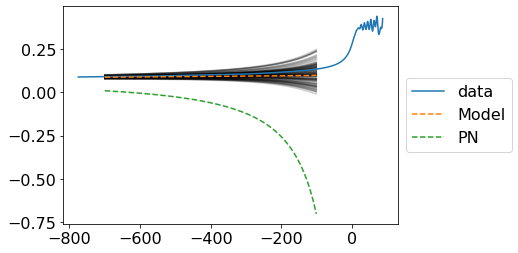

In [168]:
plt.plot(t_star, yhats_samples.T, c='k', alpha=0.2)

plt.plot(waveforms[idx].times, waveforms[idx].freq, label='data')
plt.plot(t_star, yhat, ls='--', label='Model')
plt.plot(t_star, omega_pn, ls='--', label='PN')


# plt.xlim(-800, -200)
# plt.ylim(1e-2, 0.6)
# plt.ylim(0.08, 0.12)
# plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

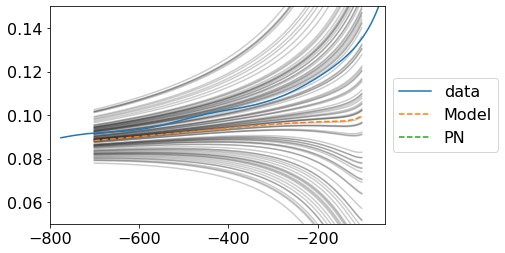

In [169]:
plt.plot(t_star, yhats_samples.T, c='k', alpha=0.2)

plt.plot(waveforms[idx].times, waveforms[idx].freq, label='data')
plt.plot(t_star, yhat, ls='--', label='Model')
plt.plot(t_star, omega_pn, ls='--', label='PN')


# plt.xlim(-800, -200)
# plt.xlim(-800, -100)
plt.xlim(-800, -50)
# plt.ylim(1e-2, 0.6)
plt.ylim(0.05, 0.15)
# plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

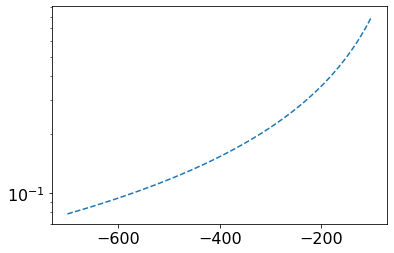

In [170]:
plt.plot(t_star, np.abs(yhat-omega_pn), ls='--', label='Model-PN')
plt.yscale('log')

# merger model